<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Все-функции" data-toc-modified-id="Все-функции-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Все функции</a></span><ul class="toc-item"><li><span><a href="#Функции-перевода-изображения-в-монохромный-формат-и-resize." data-toc-modified-id="Функции-перевода-изображения-в-монохромный-формат-и-resize.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Функции перевода изображения в монохромный формат и resize.</a></span></li><li><span><a href="#Функции-разрезания-на-ленты" data-toc-modified-id="Функции-разрезания-на-ленты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции разрезания на ленты</a></span><ul class="toc-item"><li><span><a href="#Создание-матриц-&quot;внешнего-ленточного-умножения&quot;-на-примере-матриц-A-и-B" data-toc-modified-id="Создание-матриц-&quot;внешнего-ленточного-умножения&quot;-на-примере-матриц-A-и-B-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Создание матриц "внешнего ленточного умножения" на примере матриц A и B</a></span></li></ul></li><li><span><a href="#Функции-ленточного-умножения-(block_outer_product_decomposition)" data-toc-modified-id="Функции-ленточного-умножения-(block_outer_product_decomposition)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Функции ленточного умножения (block_outer_product_decomposition)</a></span><ul class="toc-item"><li><span><a href="#Функция-внешнего-ленточного-умножения-двух-матриц" data-toc-modified-id="Функция-внешнего-ленточного-умножения-двух-матриц-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Функция внешнего ленточного умножения двух матриц</a></span></li><li><span><a href="#Ленточное-умножение-матрицы-на-транспонированную" data-toc-modified-id="Ленточное-умножение-матрицы-на-транспонированную-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Ленточное умножение матрицы на транспонированную</a></span></li></ul></li><li><span><a href="#Ленточное-умножение-для-разных-вариантов-нормализации" data-toc-modified-id="Ленточное-умножение-для-разных-вариантов-нормализации-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ленточное умножение для разных вариантов нормализации</a></span></li><li><span><a href="#Функция-рисования-списка-картинок" data-toc-modified-id="Функция-рисования-списка-картинок-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Функция рисования списка картинок</a></span></li></ul></li><li><span><a href="#Работа-функции-plot_block_outer_product_trans_decomposition-на-других-картинках" data-toc-modified-id="Работа-функции-plot_block_outer_product_trans_decomposition-на-других-картинках-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Работа функции plot_block_outer_product_trans_decomposition на других картинках</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time as tm

from skimage import io, color, img_as_float
from scipy.ndimage import map_coordinates
import cv2 


# Все функции

## Функции перевода изображения в монохромный формат и resize. 
А также функции умножения матрицы на транспонированную и различных нормализаций. 
Вдруг понадобятся ;-) 

In [2]:
t1_itogo = tm.time()

def monochrome(rgb_image):
    if len(rgb_image.shape) == 2:  # Проверяем, если изображение уже двумерное
        print("Изображение уже монохромное.")
        return rgb_image  # Возвращаем исходное изображение
    else:
        coeffs = np.array([0.299, 0.587, 0.114])
        return rgb_image @ coeffs


def resize_and_monochrome (picture, k):
    new_size = (round(picture.shape[1]/k), round(picture.shape[0]/k))
    picture = cv2.resize(picture, new_size, interpolation=cv2.INTER_AREA)
    picture_monochrome = monochrome(picture)
    return picture, picture_monochrome



In [3]:
def normalize_image(im):  
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

def norm_columns(x):
    columns_sums = np.sum(x, axis=0)
    columns_sums[columns_sums == 0] = np.finfo(float).eps
    # Убедимся, что нормализация применяется корректно
    return x / columns_sums[np.newaxis, :]

# поправила norm_rows, а то там появляется деление на ноль
def norm_rows(x):
    row_sums = np.sum(x, axis=1)
    # Замена нулей на очень маленькое число, чтобы избежать деления на ноль
    row_sums[row_sums == 0] = np.finfo(float).eps
    return x / row_sums[:, np.newaxis]


# для функции trans_mult сделали умножение лент block_outer_product_trans_decomposition 
def trans_mult(A):
    result = normalize_image(np.dot(monochrome(A), np.transpose(monochrome(A))))
    return result

def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result

def trans_mult_norm_plus_1(A):
    B = A+1
    result = normalize_image(np.dot(norm_rows(monochrome(B)), norm_columns(np.transpose(monochrome(B)))))
    return result

def normalize_image_signed(img):
    img1 = img - np.min(img)
    img2 = (2 / np.max(img1)) * img1
    return img2 - 1


def trans_mult_signed(A):
    B = normalize_image_signed(monochrome(A))
    result = normalize_image(np.dot(B, np.transpose(B)))
    return result

## Функции разрезания на ленты

### Создание матриц "внешнего ленточного умножения" на примере матриц A и B

In [4]:
# А теперь возьмем m x n и n x k

num_rows_A = 7
num_columns_A = 9
strip_width = 2
number_strips_A = num_columns_A // strip_width if num_columns_A % strip_width == 0 else num_columns_A // strip_width + 1
 

A = np.random.randint(-10, 21, size=(num_rows_A, num_columns_A))

# Разделение матрицы A на number_strips матриц размером num_rows_A*strip_width и одну матрицу "остатка" num_rows*last_strip 
# last_strip = num_columns_A%strip_width

# вот вертикальные Ленты", получившиеся из матрицы А
sub_matrices_A = np.array_split(A, number_strips_A, axis=1)




num_rows_B = 9
num_columns_B = 5
strip_width = 2
number_strips_B = num_rows_B // strip_width if num_rows_B % strip_width == 0 else num_rows_B // strip_width + 1
# last_strip_B = num_rows_B%strip_width пока закомментим

B = np.random.randint(-3, 10, size=(num_rows_B, num_columns_B))


# вот горизонтальные ленты, получившиеся из матрицы В 
sub_matrices_B = np.array_split(B, number_strips_B, axis=0)


print('Это у нас вторая вертикальная  "лента". Когда режем А.')
print(sub_matrices_A[1])
print()
print('Это у нас вторая горизонтальная  "лента". Когда режем В')
print(sub_matrices_B[1])
print()


print('форма вертикальных лент, нарезанных из матрицы А', sub_matrices_A[1].shape)
print('форма горизонтальных лент, нарезанных из матрицы В',sub_matrices_B[1].shape)
print()

#создаем множество С
C = [0] * len(sub_matrices_A)


#а вот теперь само умножение вертикальных "лент" на горизонтальные
for i in range(len(sub_matrices_A)):
    print('матрица С номер ',i+1,':')
    C[i] = sub_matrices_A[i].dot(sub_matrices_B[i])
    print(C[i])
    print()


Это у нас вторая вертикальная  "лента". Когда режем А.
[[ 19  15]
 [ 12   5]
 [ 12  20]
 [  5  -7]
 [ 12  -6]
 [ 10 -10]
 [ -9  17]]

Это у нас вторая горизонтальная  "лента". Когда режем В
[[ 2  2 -2 -3  2]
 [-2  1  8 -3  3]]

форма вертикальных лент, нарезанных из матрицы А (7, 2)
форма горизонтальных лент, нарезанных из матрицы В (2, 5)

матрица С номер  1 :
[[ -33  -78  -63  -49  -19]
 [  96  163  153   82   62]
 [ 213  196  261   25  155]
 [  51   86   81   43   33]
 [-117 -109 -144  -15  -85]
 [ -99  -63 -108   15  -75]
 [  54   43   63    0   40]]

матрица С номер  2 :
[[   8   53   82 -102   83]
 [  14   29   16  -51   39]
 [ -16   44  136  -96   84]
 [  24    3  -66    6  -11]
 [  36   18  -72  -18    6]
 [  40   10 -100    0  -10]
 [ -52   -1  154  -24   33]]

матрица С номер  3 :
[[ 28 -19  31  49  13]
 [ 11 -23  36  70  31]
 [-55 -20  27  91  70]
 [ 61 -28  47  63   6]
 [  0 -30  46  98  50]
 [ 38   1   1 -21 -27]
 [-27  21 -34 -56 -17]]

матрица С номер  4 :
[[ 32  -8  24 

## Функции ленточного умножения (block_outer_product_decomposition)

### Функция внешнего ленточного умножения двух матриц

In [5]:
def block_outer_product_decomposition(A, B, strip_width):
    num_strips_A = A.shape[1] // strip_width if A.shape[1] % strip_width == 0 else A.shape[1] // strip_width + 1
    sub_matrices_A = np.array_split(A, number_strips_A, axis=1)
    
    
    # печать второй ленты потом уберем, это для проверки
    
    print('Это у нас вторая вертикальная  "лента". Когда режем А.')
    print(sub_matrices_A[1])
    print()
    
    number_strips_B = num_rows_B // strip_width if num_rows_B % strip_width == 0 else num_rows_B // strip_width + 1
    sub_matrices_B = np.array_split(B, number_strips_B, axis=0)
    
    print('Это у нас вторая горизонтальная  "лента". Когда режем В.')
    print(sub_matrices_B[1])
    print()
    
    print('форма вертикальных лент, нарезанных из матрицы А', sub_matrices_A[1].shape)
    print('форма горизонтальных лент, нарезанных из матрицы В',sub_matrices_B[1].shape)
    print()
    
    C = [0] * len(sub_matrices_A)


    #а вот теперь само умножение вертикальных "лент" на горизонтальные
    for i in range(len(sub_matrices_A)):
        print('матрица С номер ',i+1,':')
        C[i] = sub_matrices_A[i].dot(sub_matrices_B[i])
        print(C[i])
        print()
    return C
# а почему после return обязательно печатиается то, что  return? спросить у ChatGPT

In [6]:
# проверяем работу функции ленточного умножения матриц

num_rows_A = 7
num_columns_A = 9
A = np.random.randint(-10, 21, size=(num_rows_A, num_columns_A))

num_rows_B = 9
num_columns_B = 5
B = np.random.randint(-3, 10, size=(num_rows_B, num_columns_B))


block_outer_product_decomposition(A, B, 2)

Это у нас вторая вертикальная  "лента". Когда режем А.
[[ 3 15]
 [ 9  4]
 [ 7 -8]
 [14 15]
 [ 4 -5]
 [ 2 -6]
 [-1 14]]

Это у нас вторая горизонтальная  "лента". Когда режем В.
[[ 9  1 -2  2 -3]
 [ 7  4  8 -3  2]]

форма вертикальных лент, нарезанных из матрицы А (7, 2)
форма горизонтальных лент, нарезанных из матрицы В (2, 5)

матрица С номер  1 :
[[ 72  69 -11 -20  73]
 [ 30  60 -40  50  20]
 [-43 -31  -5  31 -47]
 [ 21  27 -11   7  19]
 [ 67 109 -61  65  53]
 [-20  -5 -13  32 -25]
 [-64 -43 -11  52 -71]]

матрица С номер  2 :
[[132  63 114 -39  21]
 [109  25  14   6 -19]
 [  7 -25 -78  38 -37]
 [231  74  92 -17 -12]
 [  1 -16 -48  23 -22]
 [-24 -22 -52  22 -18]
 [ 89  55 114 -44  31]]

матрица С номер  3 :
[[ 12  15 108 -41 -29]
 [ 97  51  30 -27  70]
 [ 36  21  36 -19  17]
 [ 17  15  78 -31 -14]
 [ 38  18 -12  -2  36]
 [ 68  39  60 -33  35]
 [-13  -3  42 -13 -26]]

матрица С номер  4 :
[[ -46  -93   -6 -102  -46]
 [ -30  105  -26   66   97]
 [  70  225   -2  222  134]
 [ -14  123  

[array([[ 72,  69, -11, -20,  73],
        [ 30,  60, -40,  50,  20],
        [-43, -31,  -5,  31, -47],
        [ 21,  27, -11,   7,  19],
        [ 67, 109, -61,  65,  53],
        [-20,  -5, -13,  32, -25],
        [-64, -43, -11,  52, -71]]),
 array([[132,  63, 114, -39,  21],
        [109,  25,  14,   6, -19],
        [  7, -25, -78,  38, -37],
        [231,  74,  92, -17, -12],
        [  1, -16, -48,  23, -22],
        [-24, -22, -52,  22, -18],
        [ 89,  55, 114, -44,  31]]),
 array([[ 12,  15, 108, -41, -29],
        [ 97,  51,  30, -27,  70],
        [ 36,  21,  36, -19,  17],
        [ 17,  15,  78, -31, -14],
        [ 38,  18, -12,  -2,  36],
        [ 68,  39,  60, -33,  35],
        [-13,  -3,  42, -13, -26]]),
 array([[ -46,  -93,   -6, -102,  -46],
        [ -30,  105,  -26,   66,   97],
        [  70,  225,   -2,  222,  134],
        [ -14,  123,  -22,   90,  102],
        [  82,  141,   14,  162,   63],
        [  46,   93,    6,  102,   46],
        [ -48,  -54

### Ленточное умножение матрицы на транспонированную

In [7]:
def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res
# result = normalize_image(np.dot(monochrome(A), np.transpose(monochrome(A))))

def monochrome(rgb_image):
    if len(rgb_image.shape) == 2:  # Проверяем, если изображение уже двумерное
        # print("Изображение уже монохромное.") # м.б. потом уберем
        return rgb_image  # Возвращаем исходное изображение
    else:
        coeffs = np.array([0.299, 0.587, 0.114])
        return rgb_image @ coeffs

def block_outer_product_trans_decomposition(A, strip_width):
    number_strips_A = A.shape[1] // strip_width if A.shape[1] % strip_width == 0 else A.shape[1] // strip_width + 1
    sub_matrices_A = np.array_split(monochrome(A), number_strips_A, axis=1)
    
    
    # потом все эти print закомментим, чтобы использовать их, когда что-то не так
    
    #print('Это у нас вторая вертикальная  "лента". Когда режем А.')
    #print(sub_matrices_A[1])
    #print()
    
    B = np.transpose(monochrome(A))
    
    number_strips_B = A.shape[1] // strip_width if A.shape[1] % strip_width == 0 else A.shape[1] // strip_width + 1
    sub_matrices_B = np.array_split(B, number_strips_B, axis=0)
    
    #print('Это у нас вторая горизонтальная  "лента". Когда режем В.')
    #print(sub_matrices_B[1])
    #print()
    
    #print('форма вертикальных лент, нарезанных из матрицы А', sub_matrices_A[1].shape)
    #print('форма горизонтальных лент, нарезанных из матрицы В',sub_matrices_B[1].shape)
    #print()
    
    C = [0] * len(sub_matrices_A)
    C_total = 0


    #а вот теперь само умножение вертикальных "лент" на горизонтальные
    for i in range(len(sub_matrices_A)):
        #print('матрица С номер ',i+1,':')
        C[i]= normalize_image(np.dot((sub_matrices_A[i]), (sub_matrices_B[i])))
        #print(C[i])
        #print()
        C_total = C_total + C[i]
    return C, C_total

In [8]:
#проверка block_outer_product_trans_decomposition -
num_rows_A = 7
num_columns_A = 9
A = np.random.randint(-10, 21, size=(num_rows_A, num_columns_A))

block_outer_product, sum_outer_product = block_outer_product_trans_decomposition(A, 2)
block_outer_product[1]

array([[0.22664016, 0.05964215, 0.19085487, 0.08349901, 0.        ,
        0.08349901, 0.        ],
       [0.05964215, 0.31411531, 0.04373757, 0.10735586, 0.25049702,
        0.15506958, 0.23459245],
       [0.19085487, 0.04373757, 0.30019881, 0.4055666 , 0.30019881,
        0.31013917, 0.33200795],
       [0.08349901, 0.10735586, 0.4055666 , 0.87077535, 0.8111332 ,
        0.65606362, 0.88270378],
       [0.        , 0.25049702, 0.30019881, 0.8111332 , 0.88071571,
        0.64413519, 0.93638171],
       [0.08349901, 0.15506958, 0.31013917, 0.65606362, 0.64413519,
        0.51292247, 0.69184891],
       [0.        , 0.23459245, 0.33200795, 0.88270378, 0.93638171,
        0.69184891, 1.        ]])

In [9]:
%%time
# проверяем на parrot
parrot_raw = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

parrot_raw, parrot = resize_and_monochrome (parrot_raw, 2)

strip_width = 100

C, sum_outer_product = block_outer_product_trans_decomposition(parrot, strip_width)
C[1]

CPU times: total: 1.05 s
Wall time: 1.61 s


array([[0.50080556, 0.49544238, 0.48720858, ..., 0.22023423, 0.22193724,
        0.22556764],
       [0.49544238, 0.49066971, 0.48284625, ..., 0.21908087, 0.22077306,
        0.22431011],
       [0.48720858, 0.48284625, 0.47585358, ..., 0.21635008, 0.21805822,
        0.2215021 ],
       ...,
       [0.22023423, 0.21908087, 0.21635008, ..., 0.16021914, 0.16075101,
        0.16098644],
       [0.22193724, 0.22077306, 0.21805822, ..., 0.16075101, 0.16161609,
        0.16169805],
       [0.22556764, 0.22431011, 0.2215021 , ..., 0.16098644, 0.16169805,
        0.16216727]])

## Ленточное умножение для разных вариантов нормализации

In [10]:

def block_outer_product_trans_decomposition_norm_rows_columns(A, strip_width):
    number_strips_A = A.shape[1] // strip_width if A.shape[1] % strip_width == 0 else A.shape[1] // strip_width + 1
    sub_matrices_A = np.array_split(norm_rows(monochrome(A)), number_strips_A, axis=1)
    
    
    # потом все эти print закомментим, чтобы использовать их, когда что-то не так
    
    #print('Это у нас вторая вертикальная  "лента". Когда режем А.')
    #print(sub_matrices_A[1])
    #print()
    
    B = np.transpose(norm_columns(monochrome(A)))
    
    number_strips_B = A.shape[1] // strip_width if A.shape[1] % strip_width == 0 else A.shape[1] // strip_width + 1
    sub_matrices_B = np.array_split(B, number_strips_B, axis=0)
    
    #print('Это у нас вторая горизонтальная  "лента". Когда режем В.')
    #print(sub_matrices_B[1])
    #print()
    
    #print('форма вертикальных лент, нарезанных из матрицы А', sub_matrices_A[1].shape)
    #print('форма горизонтальных лент, нарезанных из матрицы В',sub_matrices_B[1].shape)
    #print()
    
    C = [0] * len(sub_matrices_A)
    C_total = 0

#result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    #а вот теперь само умножение вертикальных "лент" на горизонтальные
    for i in range(len(sub_matrices_A)):
        #print('матрица С номер ',i+1,':')
        C[i]= normalize_image(np.dot((sub_matrices_A[i]), (sub_matrices_B[i])))
        #print(C[i])
        #print()
        C_total = C_total + C[i]
    return C, C_total

## Функция рисования списка картинок

In [11]:
def wrap_text(text, max_length):
   
    if len(text) <= max_length:
        return text
    # Находим пробел ближайший к середине строки для красивого переноса
    split_points = [i for i, char in enumerate(text) if char == ' ']
    best_split = min(split_points, key=lambda x: abs(x - max_length))
    return text[:best_split] + '\n' + wrap_text(text[best_split+1:], max_length)

# axes[1,0].set_title(wrap_text(f'{A_name} after \n{f_1_name}', 45))


def plot_images_in_rows(C, images_per_row=5):
    
    num_images = len(C)
    num_rows = math.ceil(num_images / images_per_row)
    
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 5*num_rows))
    
    for i in range(num_images):
        row_index = i // images_per_row
        col_index = i % images_per_row
        axs[row_index, col_index].imshow(C[i], cmap = 'gray')
        axs[row_index, col_index].axis('off')
        axs[row_index, col_index].set_title(wrap_text(f'внешнее произведение лент номер {i+1}', 20))
    
    for i in range(num_images, num_rows * images_per_row):
        row_index = i // images_per_row
        col_index = i % images_per_row
        axs[row_index, col_index].axis('off')
    
    plt.show()


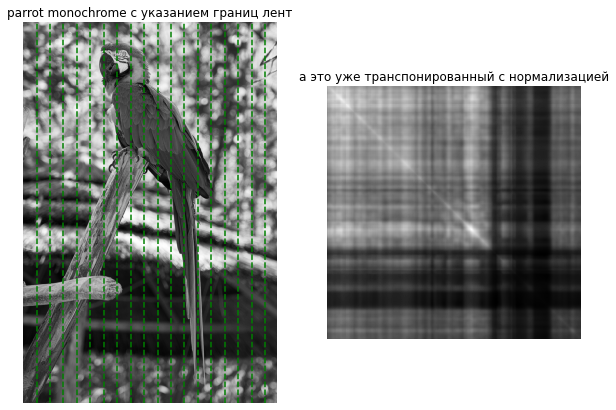

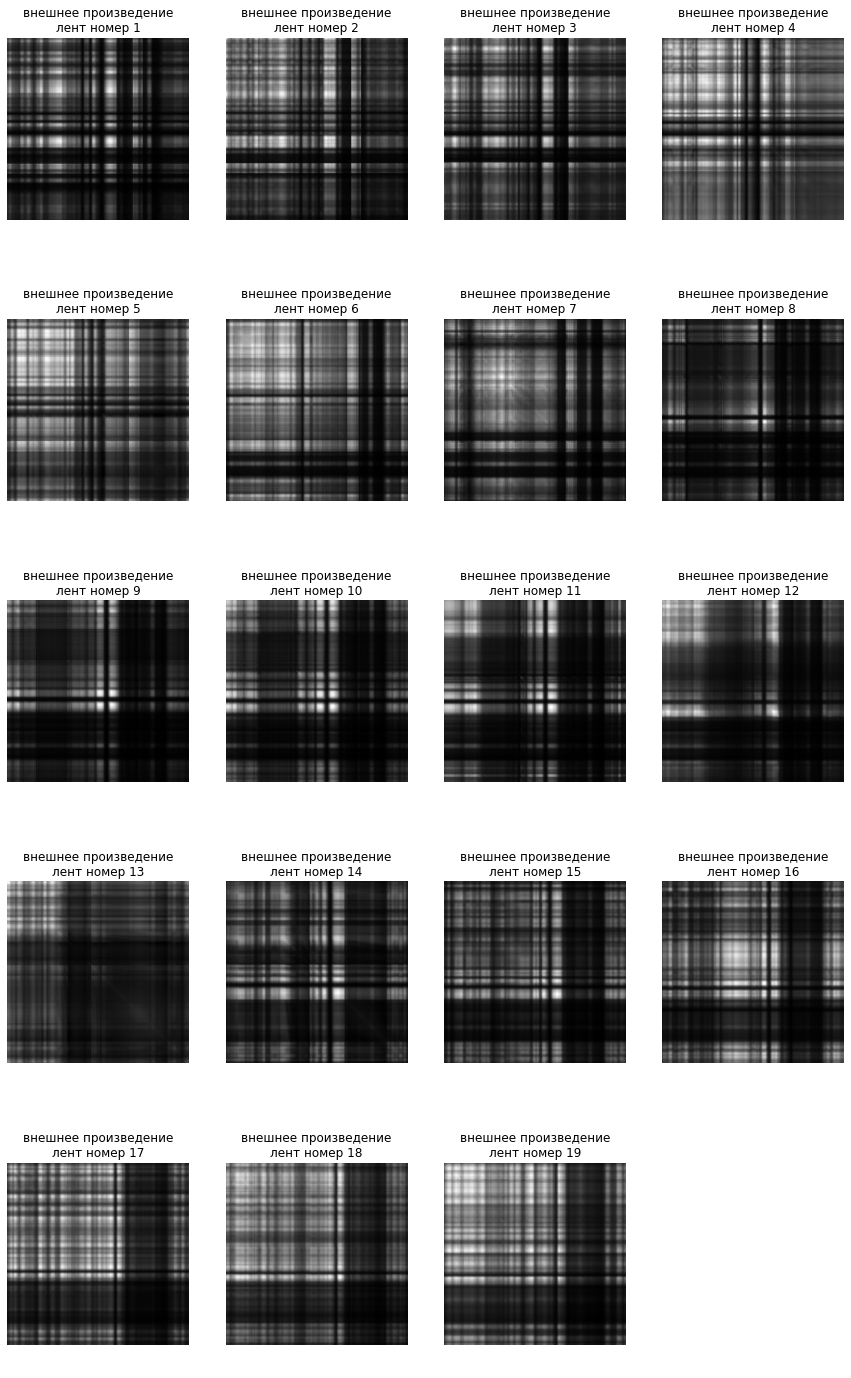

In [19]:
# функция, которая рисует произведение матрицы на транспонированную с нормализацией и все внешние умножения лент 
# попробуем в эту функцию добавить сетку
def plot_block_outer_product_trans_decomposition (picture, picture_name, strip_width=100, images_per_row=4):
    C, sum_outer_product = block_outer_product_trans_decomposition(picture, strip_width)
    num_images = len(C)
    num_rows = math.ceil(num_images / images_per_row)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 15))
    axes[0].imshow(monochrome(picture), cmap='gray')
    axes[0].set_title(f'{picture_name} monochrome с указанием границ лент')
    axes[0].axis('off')
    
    height, width = picture.shape[:2]

# Добавляем вертикальные линии сетки каждые 'strip_width' пикселей
    for i in range(strip_width, width, strip_width):
        axes[0].axvline(x=i, color='green', linestyle='--')

    
    axes[1].imshow(sum_outer_product, cmap='gray')
    axes[1].set_title('а это уже транспонированный с нормализацией')
    axes[1].axis('off')

    plt.show()
    
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 5*num_rows))
    
    for i in range(num_images):
        row_index = i // images_per_row
        col_index = i % images_per_row
        axs[row_index, col_index].imshow(C[i], cmap = 'gray')
        axs[row_index, col_index].axis('off')
        axs[row_index, col_index].set_title(wrap_text(f'внешнее произведение лент номер {i+1}', 20))
    
    for i in range(num_images, num_rows * images_per_row):
        row_index = i // images_per_row
        col_index = i % images_per_row
        axs[row_index, col_index].axis('off')
    
    plt.show()

plot_block_outer_product_trans_decomposition (parrot, 'parrot', strip_width=100, images_per_row=4)

# Работа функции plot_block_outer_product_trans_decomposition на других картинках

In [13]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

parrot = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

winter_dog = io.imread('https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib'
                       '=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

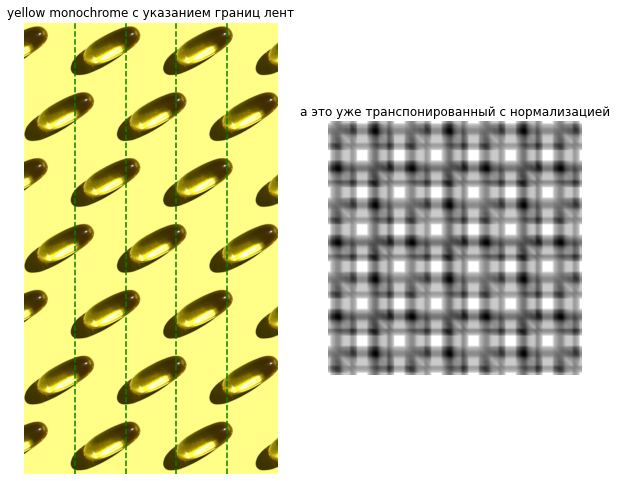

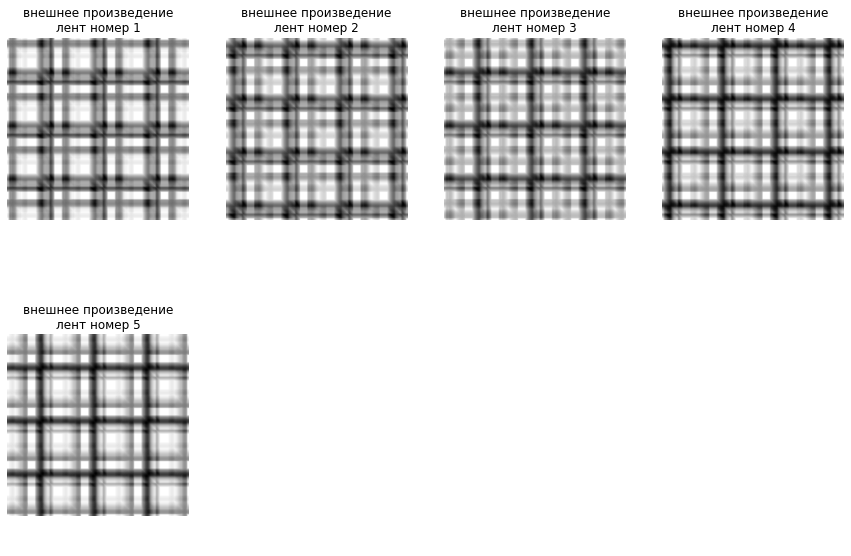

In [15]:
plot_block_outer_product_trans_decomposition (yellow, 'yellow', strip_width=100, images_per_row=4)

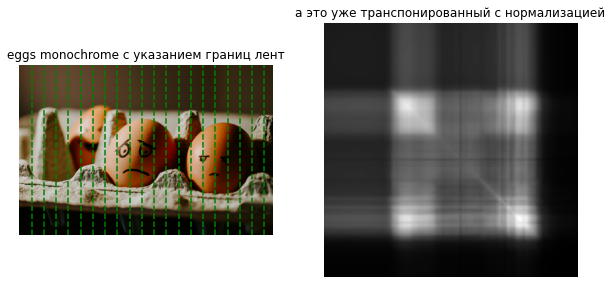

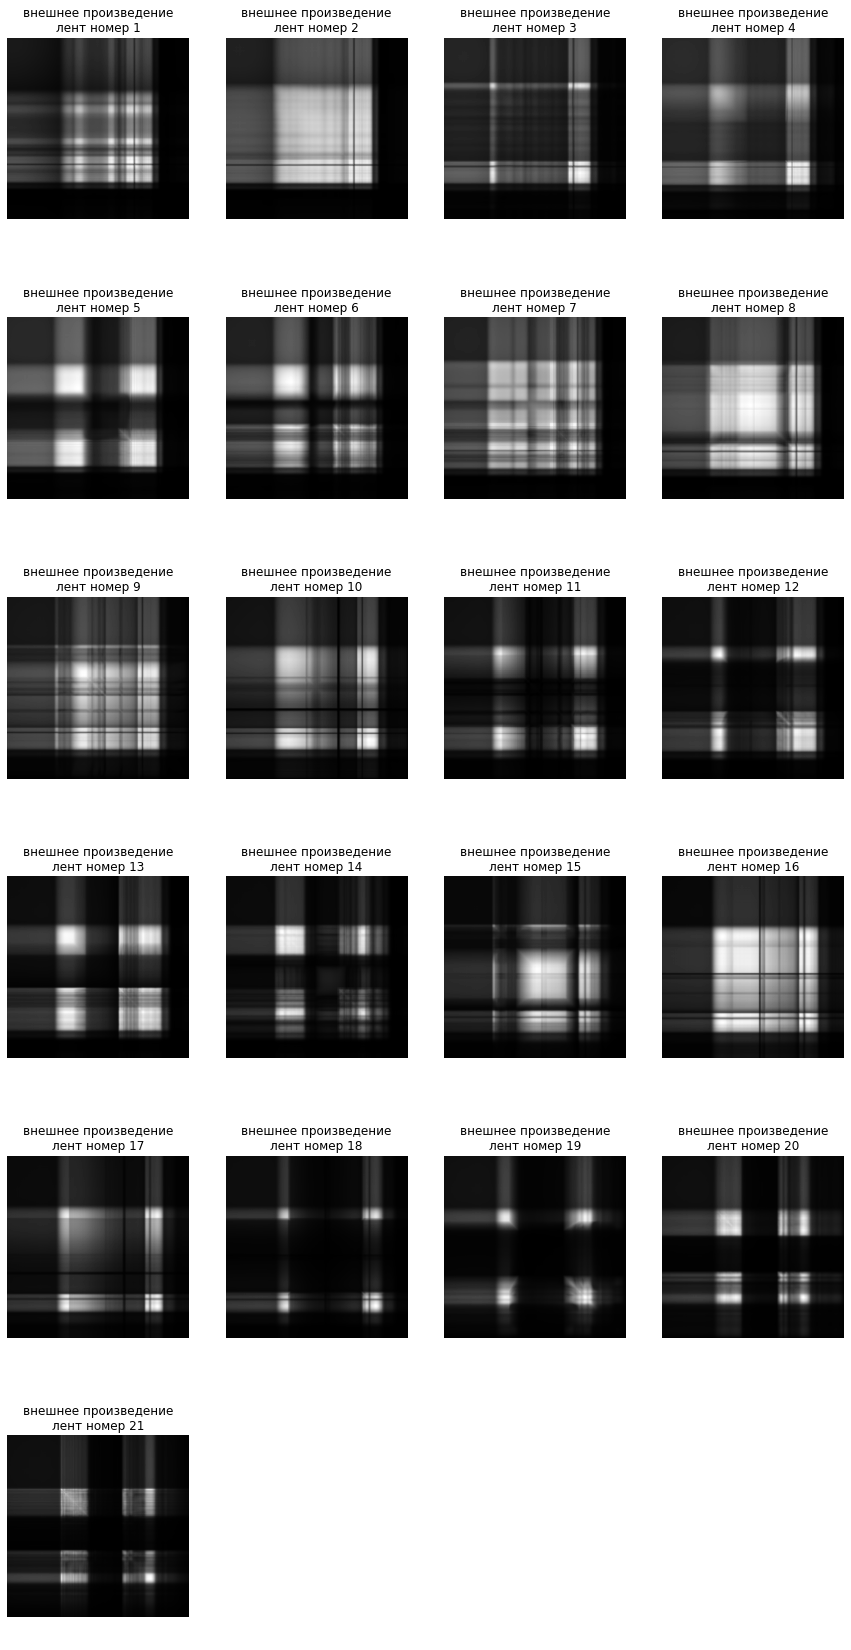

In [17]:
plot_block_outer_product_trans_decomposition (eggs, 'eggs', strip_width=100, images_per_row=4)

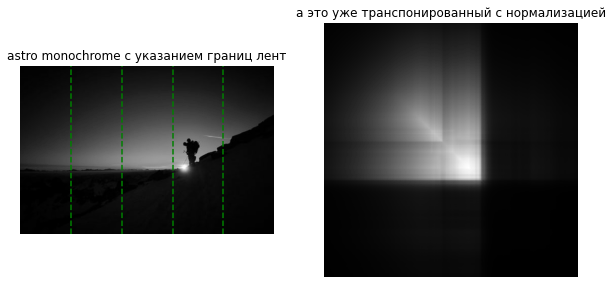

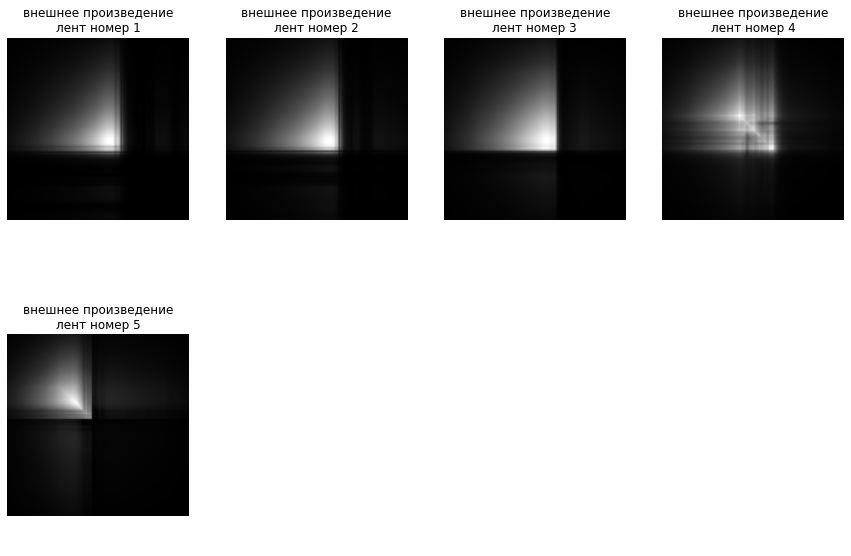

In [20]:
plot_block_outer_product_trans_decomposition (astro, 'astro', strip_width=100, images_per_row=4)

C:\Users\cab\AppData\Local\Temp\ipykernel_8584\2759064826.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (1 / np.max(im_res)) * im_res
C:\Users\cab\AppData\Local\Temp\ipykernel_8584\2759064826.py:3: RuntimeWarning: invalid value encountered in multiply
  return (1 / np.max(im_res)) * im_res


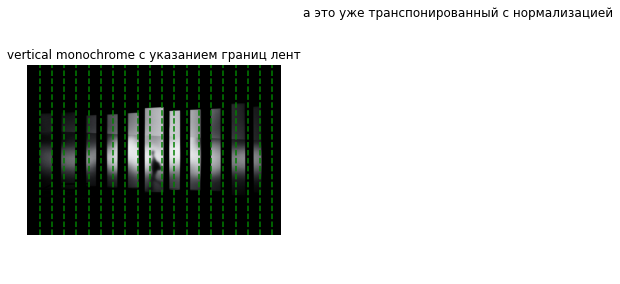

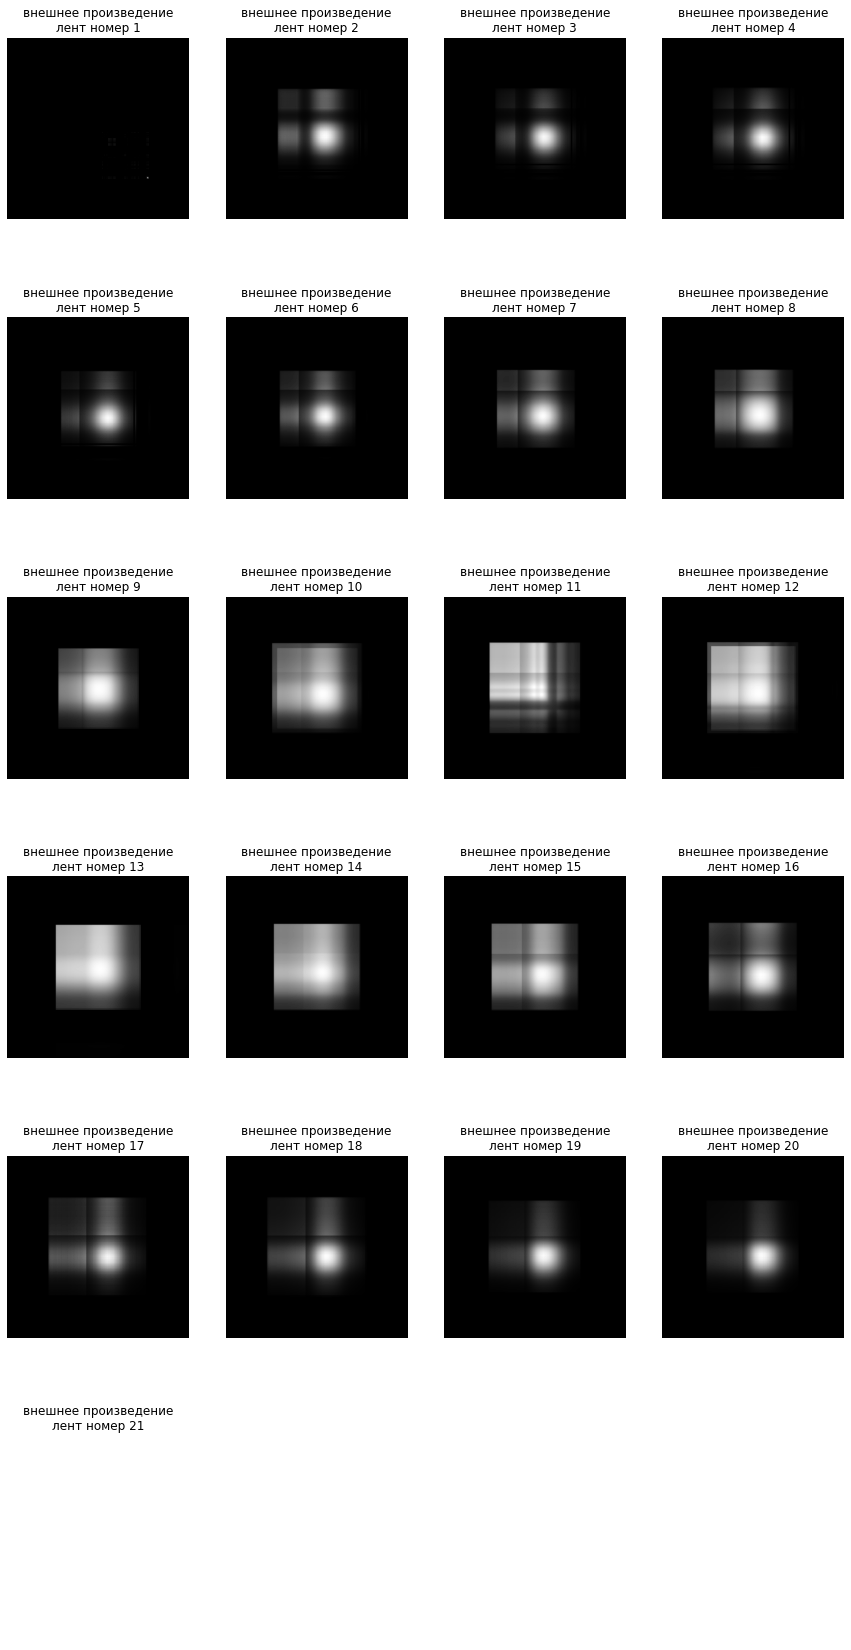

In [16]:
# предупреждение возникает из-за деления на ноль, надо будет поправить функцию
plot_block_outer_product_trans_decomposition (vertical, 'vertical', strip_width=100, images_per_row=4)

In [14]:
t2_itogo = tm.time()
print('вся тетрадка заняла', round(t2_itogo - t1_itogo)//60,'минут', round(t2_itogo - t1_itogo)%60,'секунд')

вся тетрадка заняла 0 минут 10 секунд
